In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras import backend as K

In [3]:
def build_lstm_model(input_shape=(20, 1)):
    model = Sequential()
    model.add(Input(shape=input_shape))       

    model.add(LSTM(64, activation='tanh', return_sequences=False))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(1))
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae', rmse, regression_accuracy]
    )
    return model

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def regression_accuracy(y_true, y_pred):
    return K.mean(K.less_equal(K.abs(y_true - y_pred), 0.05))

In [4]:
def plot_training_history(history):
    metrics = [m for m in history.history.keys() if not m.startswith("val_")]
    val_metrics = [f"val_{m}" for m in metrics]

    for metric, val_metric in zip(metrics, val_metrics):
        plt.figure(figsize=(8, 4))
        plt.plot(history.history[metric], label=f'Train {metric}')
        plt.plot(history.history[val_metric], label=f'Val {metric}')
        plt.title(f'{metric} vs {val_metric}')
        plt.xlabel('Epochs')
        plt.ylabel(metric)
        plt.legend()
        plt.grid(True)
        plt.show()



In [ ]:
#500 temperaturas generadas aleatoriamente
np.random.seed(42)
temperaturas = np.cumsum(np.random.randn(500) * 0.5 + 0.1) + 20 #Borrar esto y meter las temperaturas reales



500

In [9]:
scaler = MinMaxScaler()
temperaturas_norm = scaler.fit_transform(temperaturas.reshape(-1, 1)).flatten()

X, y = [], []
for i in range(len(temperaturas_norm) - 20):
    X.append(temperaturas_norm[i:i+20])
    y.append(temperaturas_norm[i+20])

X = np.array(X)
y_train = np.array(y)
X_train = X.reshape((X.shape[0], X.shape[1], 1))

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 1.1049 - mae: 0.8257 - regression_accuracy: 0.0394 - rmse: 1.0679 - val_loss: 0.6069 - val_mae: 0.7778 - val_regression_accuracy: 0.0000e+00 - val_rmse: 0.7784
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8079 - mae: 0.7116 - regression_accuracy: 0.0432 - rmse: 0.9847 - val_loss: 0.4515 - val_mae: 0.6704 - val_regression_accuracy: 0.0000e+00 - val_rmse: 0.6712
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6701 - mae: 0.6172 - regression_accuracy: 0.0497 - rmse: 0.9320 - val_loss: 0.3358 - val_mae: 0.5777 - val_regression_accuracy: 0.0000e+00 - val_rmse: 0.5787
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6180 - mae: 0.5765 - regression_accuracy: 0.0581 - rmse: 0.8738 - val_loss: 0.2668 - val_mae: 0.5148 - val_regression_accuracy: 0.0000e+00 - val_rmse: 0.5158
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4557 - mae: 0.5235 - regression_accuracy: 0.0569 - rmse: 0.7475

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,461 (232.27 KB)

 Trainable params: 19,745 (77.13 KB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 39,492 (154.27 KB)

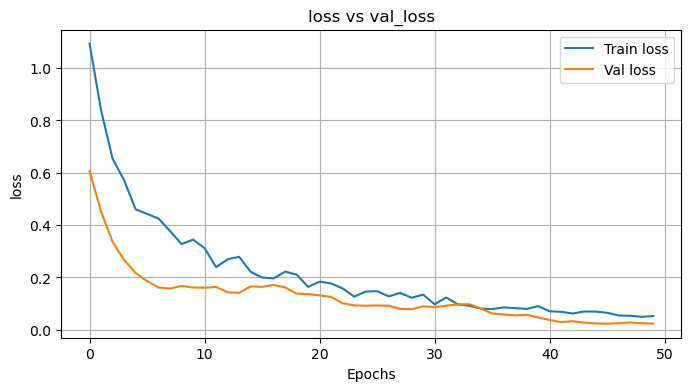

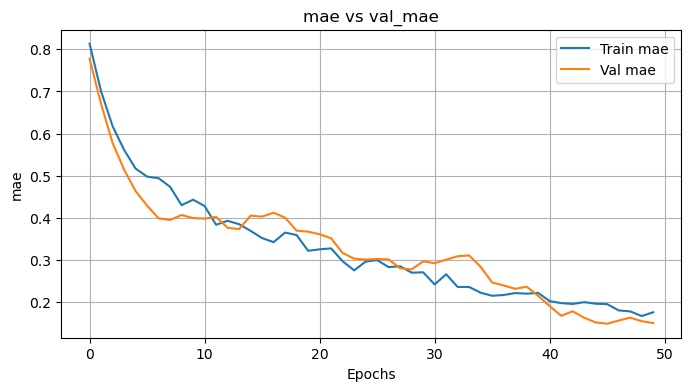

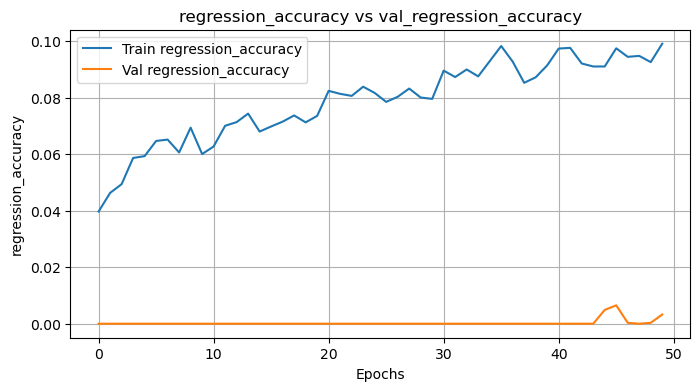

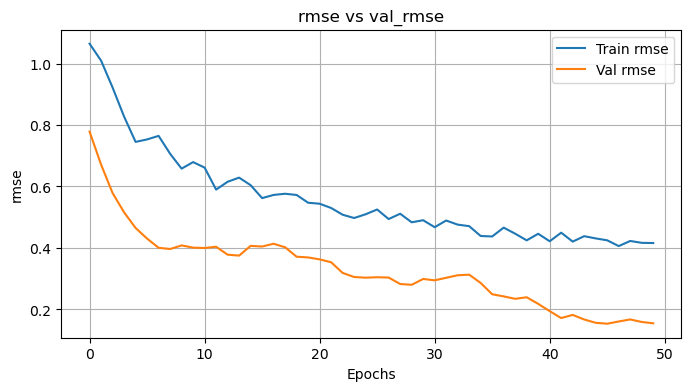

In [42]:
model = build_lstm_model(input_shape=(20, 1))  
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)
model.summary()

plot_training_history(history)

In [43]:
model.save("modelo_lstm_temperatura.keras")